<a href="https://colab.research.google.com/github/Gulzar-khan/ML-PRACTICE/blob/main/Assignment_Solution_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Objective </b></u>
## <b>To predict the whether a customer will churn or not, based on the variables available in the Telco customer churn data. </b>


### Logistic regression does not make many of the key assumptions of linear regression and general linear models that are based on ordinary least squares algorithms – particularly regarding linearity, normality, homoscedasticity, and measurement level.

### First, logistic regression does not require a linear relationship between the dependent and independent variables.  Second, the error terms (residuals) do not need to be normally distributed.  Third, homoscedasticity is not required.  Finally, the dependent variable in logistic regression is not measured on an interval or ratio scale.

### However, some other assumptions still apply.

### First, binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

### Second, logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

### Third, logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.

### Fourth, logistic regression assumes linearity of independent variables and log odds.  although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.


### <b> In this assignment, you need to do the following : </b>

* ### Remove correlated variables and run Logistic Regression
* ### Also implement regularized logistic regression using the hyperparameter C in the sklearn implementation. Add details about how this hyperparameter affects the learning and performance of the model.
* ### Evaluate your logistic regression models using metrics such as roc_auc, log_loss, precision, recall, accuracy and f-score. You already know these metrics from your assignments in Module 1. Explain your observations about these metrics results.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
churn_df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/ML/week 9/4. Logistic Regression/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
churn_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
len(churn_df[churn_df.duplicated()])

0

In [ ]:
churn_df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

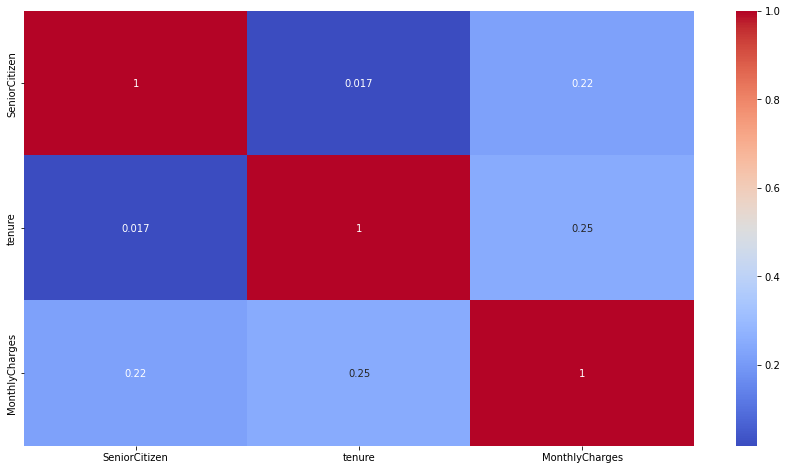

In [ ]:
churn_df
 ## Correlation
plt.figure(figsize=(15,8))
correlation = churn_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


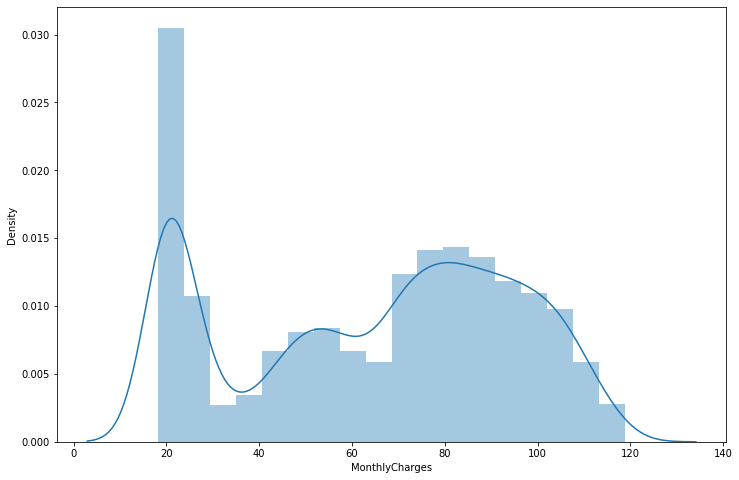

In [ ]:
plt.figure(figsize=(12,8))

sns.distplot(churn_df['MonthlyCharges']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


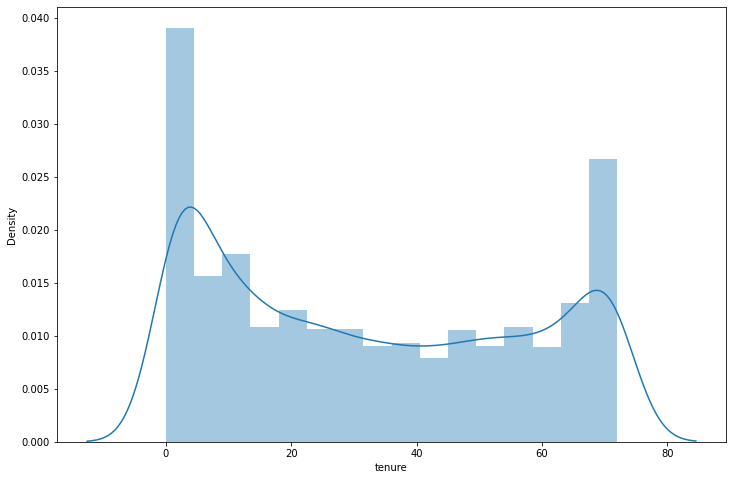

In [ ]:
plt.figure(figsize=(12,8))

sns.distplot(churn_df['tenure']);

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


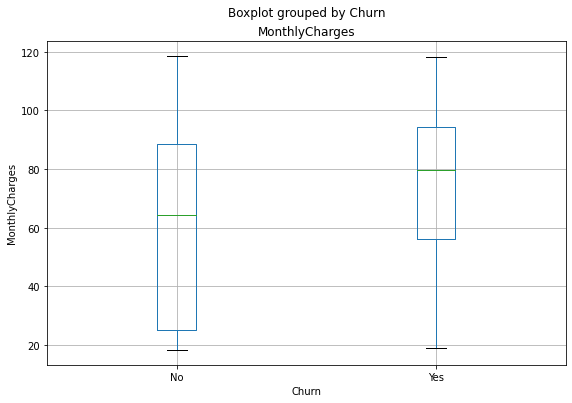

In [ ]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
churn_df.boxplot(column = 'MonthlyCharges', by = 'Churn', ax = ax)
ax.set_ylabel("MonthlyCharges")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


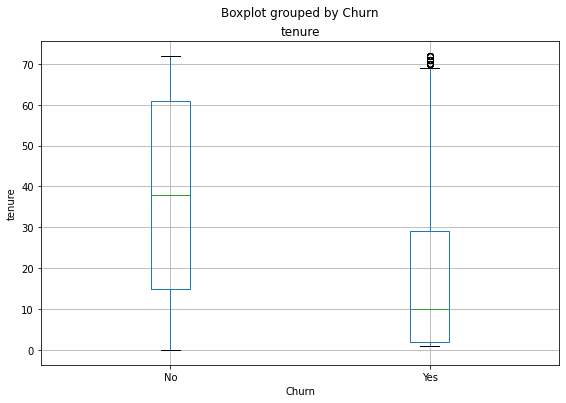

In [ ]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
churn_df.boxplot(column = 'tenure', by = 'Churn', ax = ax)
ax.set_ylabel("tenure")
plt.show()

In [ ]:
# churn_df=churn_df.iloc[:,1:-1]

In [ ]:
# churn_df= churn_df.drop(['customerID'], axis = 1)

In [ ]:


a = churn_df[['gender','Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup' ,'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']]

In [ ]:
a

,gender,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,Female,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,Female,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,Male,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


In [ ]:
a = pd.get_dummies(a,drop_first=True)

In [ ]:
a

,gender_Male,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,0,1,0,0,0,1,0,...,0,1,0,1,1,0,1,0,0,1
7039,0,1,1,0,1,1,0,0,0,0,...,0,1,0,1,1,0,1,1,0,0
7040,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


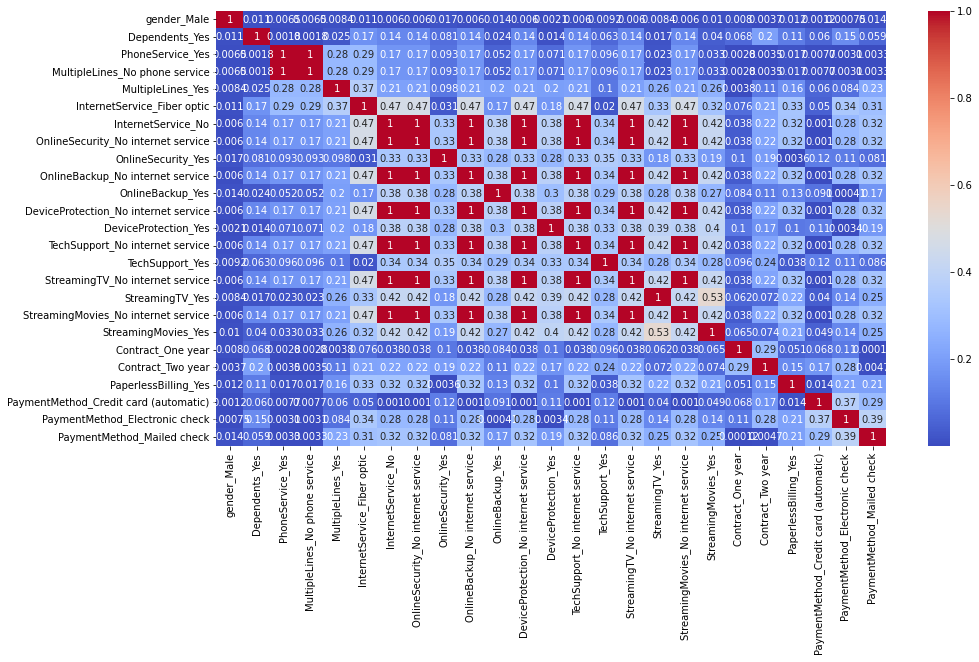

In [ ]:
plt.figure(figsize=(15,8))
correlation = a.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
churn_df['class'] = churn_df['Churn'].apply(lambda x : 1 if x == "Yes" else 0)

In [ ]:
churn_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,class
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,1


In [ ]:
churn_df[~churn_df.TotalCharges.str.contains(" ",'')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,class
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,1


In [ ]:
churn_df[churn_df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,class
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,,No,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,No,Two year,No,Mailed check,73.35,,No,0


In [ ]:
churn_df['TotalCharges'] = churn_df['TotalCharges'].replace(' ', np.nan)

In [ ]:
churn_df[churn_df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,class


In [ ]:
churn_df['TotalCharges'].isna().sum()

11

In [ ]:
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'])

In [ ]:
df1=churn_df.loc[:,['MonthlyCharges','TotalCharges','tenure','class']]

In [ ]:
 n_df=pd.concat([a, df1.reindex(a.index)], axis=1)

In [ ]:
n_df

,gender_Male,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges,TotalCharges,tenure,class
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,29.85,29.85,1,0
1,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,1,56.95,1889.50,34,0
2,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,53.85,108.15,2,1
3,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,42.30,1840.75,45,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,70.70,151.65,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,0,1,0,0,0,1,0,...,1,0,1,0,0,1,84.80,1990.50,24,0
7039,0,1,1,0,1,1,0,0,0,0,...,1,0,1,1,0,0,103.20,7362.90,72,0
7040,0,1,0,1,0,0,0,0,1,0,...,0,0,1,0,1,0,29.60,346.45,11,0
7041,1,0,1,0,1,1,0,0,0,0,...,0,0,1,0,0,1,74.40,306.60,4,1


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


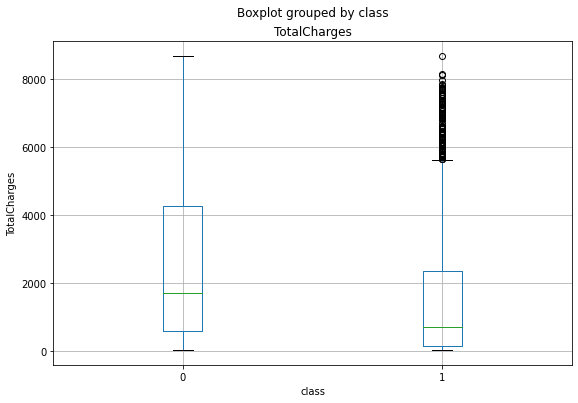

In [ ]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
n_df.boxplot(column = 'TotalCharges', by = 'class', ax = ax)
ax.set_ylabel("TotalCharges")
plt.show()

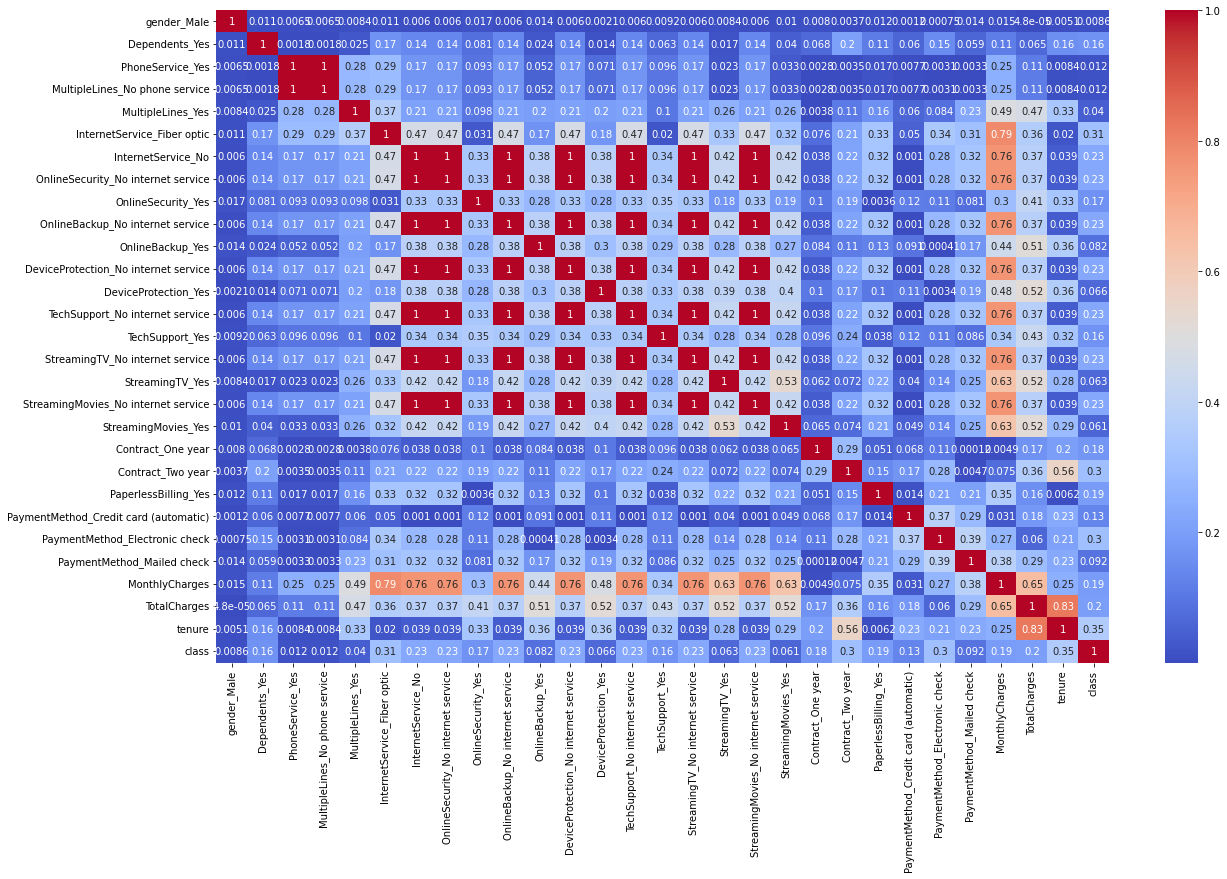

In [ ]:
plt.figure(figsize=(20,12))
correlation = n_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
n_df.drop(['InternetService_Fiber optic',	'InternetService_No','OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service',	'TechSupport_No internet service','StreamingTV_No internet service','StreamingTV_Yes',	'StreamingMovies_No internet service','StreamingMovies_Yes','MultipleLines_No phone service','Contract_Two year','MultipleLines_Yes','OnlineBackup_Yes','DeviceProtection_Yes','Dependents_Yes','Dependents_Yes','Dependents_Yes','Contract_One year','PaymentMethod_Credit card (automatic)','TechSupport_Yes','OnlineSecurity_Yes','PaymentMethod_Mailed check','PaperlessBilling_Yes','PaymentMethod_Electronic check'],axis=1,inplace=True)

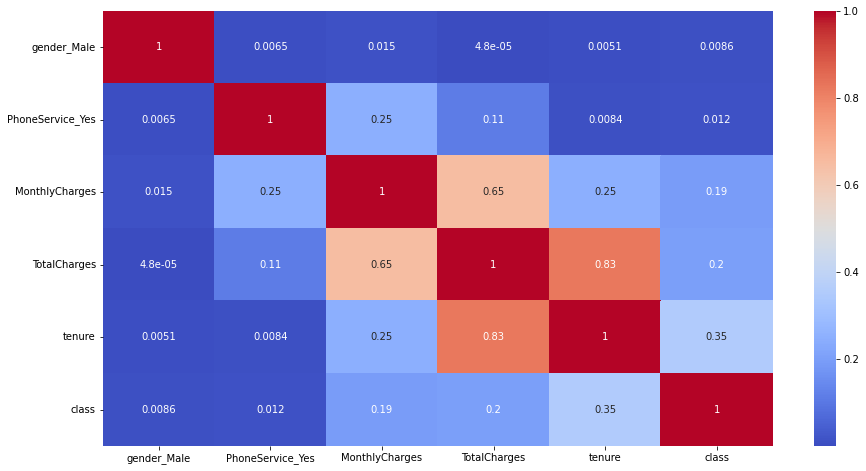

In [ ]:
plt.figure(figsize=(15,8))
correlation = n_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
n_df

,gender_Male,PhoneService_Yes,MonthlyCharges,TotalCharges,tenure,class
0,0,0,29.85,29.85,1,0
1,1,1,56.95,1889.50,34,0
2,1,1,53.85,108.15,2,1
3,1,0,42.30,1840.75,45,0
4,0,1,70.70,151.65,2,1
...,...,...,...,...,...,...
7038,1,1,84.80,1990.50,24,0
7039,0,1,103.20,7362.90,72,0
7040,0,0,29.60,346.45,11,0
7041,1,1,74.40,306.60,4,1


In [ ]:
n_df.replace([np.inf, -np.inf], np.nan).dropna(axis=0,inplace=True)

In [ ]:
n_df.dropna(inplace = True)


In [ ]:
X = n_df.iloc[:,:-1]
y = n_df['class'].copy()

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(5625, 5)
(1407, 5)


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
clf.coef_

array([[-3.02723324e-01, -8.25776701e-01,  3.08533186e-02,
         2.34030909e-04, -7.65856036e-02]])

In [ ]:
clf.intercept_

array([-0.67618567])

In [ ]:
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [ ]:
from sklearn import metrics
accur=metrics.accuracy_score(y_pred_train, y_train)
print(accur)

0.7895111111111112


In [ ]:
accur1=metrics.accuracy_score(y_pred, y_test)

In [ ]:
print(accur1)

0.7860696517412935


 Accuracy will require two inputs (i) actual class labels (ii)predicted class labels. To get the class labels from probabilities( these probabilities will be probabilities of getting a HIT), you can take a threshold of 0.5. Any probability above 0.5 will be labeled as class 1 and anything less than 0.5 will be labeled as class 0.

Basically it is calculated as correct prediction by total no. of prediction like in our case it can be (938+168)/1407=0.786 fot test set data.

In [ ]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [ ]:
test_preds

array([[0.7754452 , 0.2245548 ],
       [0.9102906 , 0.0897094 ],
       [0.72372574, 0.27627426],
       ...,
       [0.48990845, 0.51009155],
       [0.75480056, 0.24519944],
       [0.54169877, 0.45830123]])

In [ ]:
train_preds

array([[0.82160108, 0.17839892],
       [0.8208    , 0.1792    ],
       [0.99748295, 0.00251705],
       ...,
       [0.75304344, 0.24695656],
       [0.45658622, 0.54341378],
       [0.86587152, 0.13412848]])

In [ ]:
metrics.confusion_matrix(y_pred_train, y_train)

array([[3733,  792],
       [ 392,  708]])

In [ ]:
metrics.confusion_matrix(y_pred, y_test)

array([[938, 201],
       [100, 168]])

From the confusion matrix we can say that :

True positive(TP).: This shows that a model correctly predicted Positive cases as Positive.

False positive(FP): This shows that a model incorrectly predicted Negative cases as Positive.

False Negative:(FN) This shows that an incorrectly model predicted Positive cases as Negative.

True Negative(TN): This shows that a model correctly predicted Negative cases as Positive.

In this case of our  data, the model correctly predicts 938 cases as people who not churn and predicted as not churn and 168 cases as people who churn and our model also predicted as churn.
In contrast, it mispredicts a total of 301 cases.

In [ ]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1139
           1       0.46      0.63      0.53       268

    accuracy                           0.79      1407
   macro avg       0.68      0.73      0.69      1407
weighted avg       0.82      0.79      0.80      1407



Precision is 0.90 means 90 percent times it predicted correctly that people not churn from all the cases of people actully  not churns similarly as in people who churns are 367 but it predicted 168 times that they churns so its precision is low 

Recall= peolple truly predicted who not churn /people who predicted churns hence it is 938/(938+201)=0.82 similarly for people who churn.

The F1 score is calculated based on the precision and recall of each class. It is the weighted average of the Precision and the recall scores. The F1 score reaches its perfect value at one and worst at 0.It is a very good way to show that a classifies has a good recall and precision values.

In [ ]:
metrics.roc_auc_score(y_train, train_preds[:,1])

0.8132475151515152

In [ ]:
metrics.roc_auc_score(y_test, test_preds[:,1])

0.8057866127794225

The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.


A ROC Curve is a plot of the true positive rate and the false positive rate for a given set of probability predictions at different thresholds used to map the probabilities to class labels. The area under the curve is then the approximate integral under the ROC Curve.

In our case our auc-roc value is 0.80 so we caan say that our model predicted the classes in a good manner.

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test,test_preds[:,1])

0.45337025358528094

A good and model should have a smaller log loss value.

---



In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [ ]:

logistic=LogisticRegression()

In [ ]:
scoring = ['accuracy']
scores = cross_validate(logistic,X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.787, test=0.794) total time=   0.2s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.792, test=0.781) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] END ................ accuracy: (train=0.791, test=0.778) total time=   0.2s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.785, test=0.805) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s


[CV] END ................ accuracy: (train=0.791, test=0.776) total time=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished


In [ ]:
scores['train_accuracy']

array([0.78688889, 0.79177778, 0.79088889, 0.78533333, 0.79066667])

In [ ]:
scores['test_accuracy']

array([0.79377778, 0.78133333, 0.77777778, 0.80533333, 0.776     ])

In [ ]:
scores['estimator']

[LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression()]

In [ ]:
for model in scores['estimator']:
    print(model.coef_)

[[ 4.42847007e-02 -1.05252727e+00  3.34017914e-02  2.02440328e-04
  -7.40038120e-02]]
[[-2.52637644e-01 -8.61997858e-01  3.10690563e-02  2.17293716e-04
  -7.41370048e-02]]
[[ 7.97251432e-03 -1.08545057e+00  3.53158998e-02  1.56948604e-04
  -7.11700302e-02]]
[[ 3.29315155e-02 -9.51238554e-01  3.24024619e-02  2.24597851e-04
  -7.58561106e-02]]
[[ 2.95854575e-04 -1.02303477e+00  3.36587595e-02  2.14733750e-04
  -7.71373351e-02]]


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
solvers = ['lbfgs']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.787780 using {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.787306 (0.011100) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.787306 (0.011296) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.787306 (0.011223) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.787686 (0.011558) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.787780 (0.011121) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


From seeing the results from above i hace a intution that the lesser the value of c in my case will help me to create the good model.becase with lower value of c=0.01 we have higher value of score.